In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('experiment_logbook.csv')

# Display the DataFrame
print(df.columns)


Index(['num_hidden_layers', 'hidden_size', 'trainable_params', 'unique_id',
       'seed', 'normalize_mean', 'normalize_std', 'dataset', 'optimizer', 'lr',
       'weight_decay', 'epochs', 'batch size', 'best_epoch', 'best_val',
       'best_train', 'training loss', 'validation loss', 'model'],
      dtype='object')


In [11]:
df['hidden_size']

0    512
1    512
2     16
Name: hidden_size, dtype: int64

In [5]:
import ast

vals = []

for i in range(len(df)):
    vals.append(ast.literal_eval(df['validation loss'][i]))


In [6]:
import numpy as np
vals = np.array(vals)

In [7]:
def exponential_moving_average(data, alpha):
    ema = [data[0]]  # Initial EMA value is the first data point
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return ema


In [8]:
val_emas = exponential_moving_average(vals[2], 2)
val_emas

[3239.26904296875,
 3238.763671875,
 3239.009765625,
 3238.48681640625,
 3238.76953125,
 3237.6484375,
 3237.95166015625,
 3236.92041015625,
 3236.98095703125,
 3236.1796875,
 3236.357421875,
 3235.76953125,
 3236.166015625,
 3235.69775390625,
 3235.77099609375,
 3234.5732421875,
 3233.76806640625,
 3231.8798828125,
 3230.42236328125,
 3228.287109375,
 3227.09130859375,
 3225.1884765625,
 3223.9892578125,
 3221.2919921875,
 3219.0439453125,
 3215.17041015625,
 3211.89306640625,
 3207.33984375,
 3204.3251953125,
 3200.7578125,
 3198.70068359375,
 3195.494140625,
 3193.5625,
 3190.08544921875,
 3187.44970703125,
 3183.072265625,
 3180.40966796875,
 3177.298828125,
 3176.47119140625,
 3174.45751953125,
 3173.87939453125,
 3170.96923828125,
 3169.95068359375,
 3166.7294921875,
 3165.83984375,
 3163.03564453125,
 3162.97216796875,
 3160.8486328125,
 3160.26513671875,
 3156.89208984375]

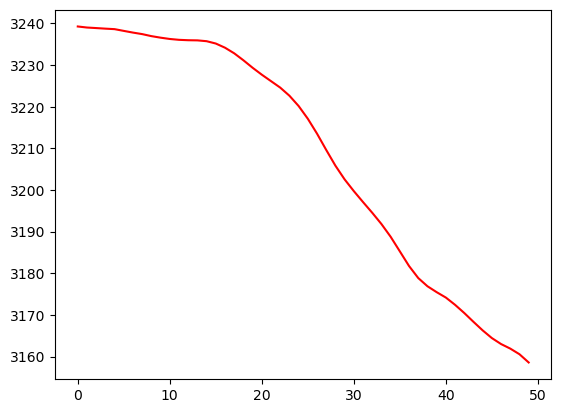

In [9]:
import matplotlib.pyplot as plt
plt.plot(val_emas[2], color='blue')
plt.plot(vals[2], color='red')
# plt.ylim(5, 10)

In [109]:
alpha = 0.1  # Adjust the decay rate as needed
weights = np.exp(-alpha * np.arange(len(X)))
weights

array([1.        , 0.90483742, 0.81873075, 0.74081822, 0.67032005,
       0.60653066, 0.54881164, 0.4965853 , 0.44932896, 0.40656966,
       0.36787944, 0.33287108, 0.30119421, 0.27253179, 0.24659696,
       0.22313016, 0.20189652, 0.18268352, 0.16529889, 0.14956862,
       0.13533528, 0.12245643, 0.11080316, 0.10025884, 0.09071795,
       0.082085  , 0.07427358, 0.06720551, 0.06081006, 0.05502322,
       0.04978707, 0.0450492 , 0.0407622 , 0.03688317, 0.03337327,
       0.03019738, 0.02732372, 0.02472353, 0.02237077, 0.02024191,
       0.01831564, 0.01657268, 0.01499558, 0.01356856, 0.01227734,
       0.011109  , 0.01005184, 0.00909528, 0.00822975, 0.00744658])

In [107]:
import numpy as np
from sklearn.linear_model import LinearRegression

slopes_exp = []
intercepts_exp = []
y_preds = []

for sample in range(len(df)):
    # Define an exponential decay factor (alpha) to assign weights to observations
    epochs = np.arange(df['epochs'][sample])
    val_loss_history = vals[sample]

    alpha = 0.1  # Adjust the value of alpha based on the desired emphasis on recent losses

    # Calculate the weights using exponential decay
    weights = np.exp(alpha * np.arange(len(val_loss_history)))

    # Assuming epochs is an array representing the epochs or iterations (e.g., [1, 2, 3, ...])

    # Perform exponential weighted linear regression
    X_weighted = epochs.reshape(-1, 1)  # Reshape to a single column
    y_weighted = val_loss_history.reshape(-1, 1)  # Reshape to a single column

    # Apply weights to the observations
    weighted_X = X_weighted * weights[:, np.newaxis]
    weighted_y = y_weighted * weights[:, np.newaxis]

    # Fit the weighted linear regression model
    model = LinearRegression()
    model.fit(weighted_X, weighted_y) 



    # # Assuming loss_history is your training loss history (a 1D numpy array)
    # # Assuming epochs is an array representing the epochs or iterations (e.g., [1, 2, 3, ...])
    # # Reshape loss_history and epochs to make them 2D arrays
    # X = np.arange(df['epochs'][sample]).reshape(-1, 1)  # Reshape to a single column
    # y = vals[sample].reshape(-1, 1)  # Reshape to a single column

    # # Create and fit the linear regression model
    # model = LinearRegression()
    # model.fit(X, y)

    # Retrieve the slope (coefficient) of the regression line
    slope = model.coef_[0][0]
    slopes_exp.append(slope)

    intercept = model.intercept_
    intercepts_exp.append(intercept)

    y_pred = model.predict(X_weighted)
    y_preds.append(y_pred)

    print(f"Slope and intercept of the regression line for exp {sample}: {slope}, {intercept}")


Slope and intercept of the regression line for exp 0: 0.18471766470586207, [70.1899448]
Slope and intercept of the regression line for exp 1: 0.07661878032240176, [33.95310674]
Slope and intercept of the regression line for exp 2: 0.09214192122986177, [28.02182546]
Slope and intercept of the regression line for exp 3: 0.17280457596155305, [28.37269731]
Slope and intercept of the regression line for exp 4: 0.1245662743644091, [7.08146471]
Slope and intercept of the regression line for exp 5: 0.1995221462495645, [74.36259881]
Slope and intercept of the regression line for exp 6: 0.07486096966973439, [42.38286484]
Slope and intercept of the regression line for exp 7: 0.08073639275370274, [35.05231198]
Slope and intercept of the regression line for exp 8: 0.08335806225596658, [42.51686288]
Slope and intercept of the regression line for exp 9: 0.10476516176447387, [36.20640167]
Slope and intercept of the regression line for exp 10: 0.21211225613512336, [55.92993627]


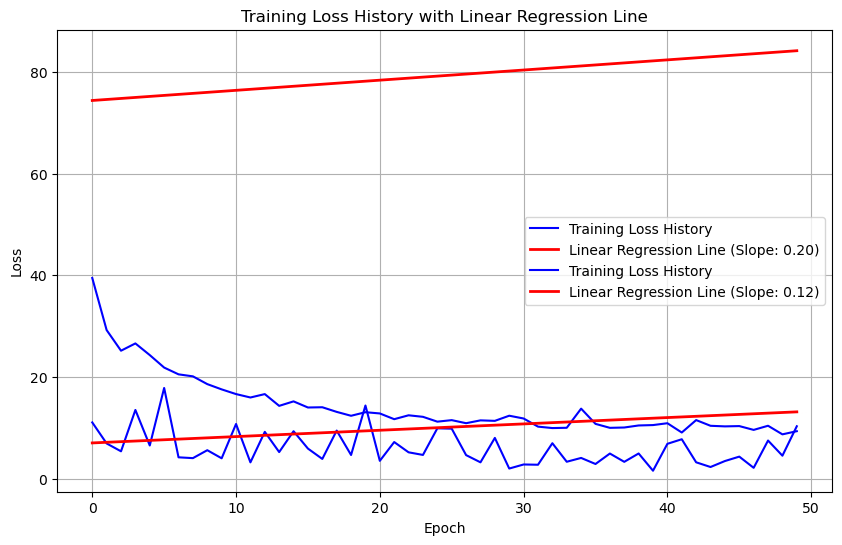

In [108]:
sample = 5
X = np.arange(df['epochs'][sample]).reshape(-1, 1)

# Plot the training loss history data and the linear regression line
plt.figure(figsize=(10, 6))
plt.plot(X, vals[sample], color='blue', label='Training Loss History')
plt.plot(X, y_preds[sample], color='red', linewidth=2, label=f'Linear Regression Line (Slope: {slopes_exp[sample]:.2f})')

sample = 4
X = np.arange(df['epochs'][sample]).reshape(-1, 1)

# Plot the training loss history data and the linear regression line
plt.plot(X, vals[sample], color='blue', label='Training Loss History')
plt.plot(X, y_preds[sample], color='red', linewidth=2, label=f'Linear Regression Line (Slope: {slopes_exp[sample]:.2f})')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History with Linear Regression Line')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
import numpy as np

arr = np.arange(50)
print(arr)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [60]:
df['epochs'][0]

50

In [119]:
def exponential_smoothing(series, alpha):
    """
    Compute exponential smoothing of given series.

    Parameters:
    - series: A pandas Series representing the time series data.
    - alpha: Smoothing factor (0 < alpha < 1).

    Returns:
    - smoothed_series: A pandas Series containing the exponentially smoothed values.
    """
    smoothed_series = []
    smoothed_series.append(series[0])  # Initialize with the first observed value

    for t in range(1, len(series)):
        smoothed_series.append(alpha * series[t] + (1 - alpha) * smoothed_series[t - 1])

    return np.array(smoothed_series)

In [122]:
exp_val = exponential_smoothing(vals[2], 0.1)

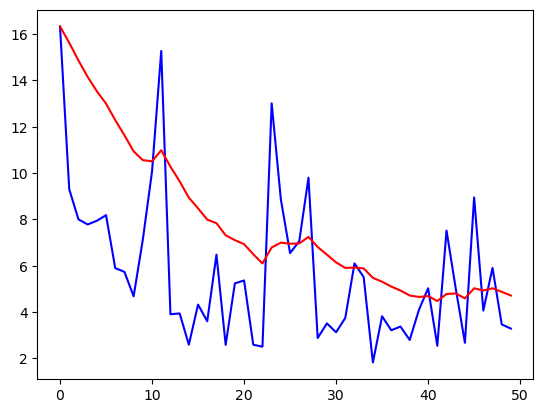

In [123]:
plt.plot(vals[2], color='blue')
plt.plot(exp_val, color='red')